In [28]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.io as scio
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import sklearn.metrics as metrics

In [29]:
import os
os.chdir('/root/autodl-tmp/Spagc')

In [30]:
data_name = '151673'

In [31]:
dataset_name = 'DLPFC'

In [32]:
n_clusters = 5 if data_name in ['151669', '151670', '151671', '151672'] else 7

In [33]:
input_dir = os.path.join('./Results','Data',dataset_name,data_name)
output_dir = os.path.join('./Results', 'Figure',dataset_name,data_name)

#adata of train over 

In [59]:
adata = sc.read(os.path.join(input_dir,data_name+'_best_raw.h5ad'))

In [60]:
adata

AnnData object with n_obs × n_vars = 3639 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'mclust', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'CroSP', 'spatial'

In [38]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [39]:
obs_df = adata.obs.dropna()
ARI = metrics.adjusted_rand_score(obs_df['mclust'], obs_df['Ground Truth'])
AMI = metrics.adjusted_mutual_info_score(obs_df['mclust'], obs_df['Ground Truth'])
NMI = metrics.normalized_mutual_info_score(obs_df['mclust'], obs_df['Ground Truth'])
HC =  metrics.homogeneity_score(obs_df['mclust'], obs_df['Ground Truth'])
print('ARI = %.4f' %ARI)
print('AMI = %.4f' %AMI)
print('NMI = %.4f' %NMI)
print('HC = %.4f' %HC)

ARI = 0.6187
AMI = 0.7116
NMI = 0.7124
HC = 0.7213


In [40]:
%matplotlib inline

[<Axes: title={'center': 'CroSP (ARI=0.619)'}, xlabel='spatial1', ylabel='spatial2'>,
 <Axes: title={'center': 'Ground Truth'}, xlabel='spatial1', ylabel='spatial2'>]

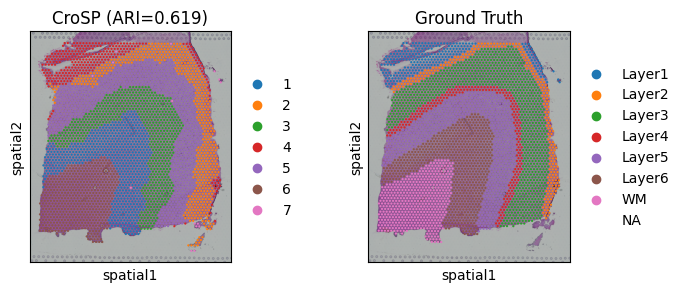

In [ ]:
# adata
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.spatial(adata, color=["mclust", "Ground Truth"], title=['CroSP (ARI=%.3f)'%ARI, "Ground Truth"],show=False)
# plt.axis('off')
# plt.savefig(os.path.join(output_dir, f'pred_domain.svg'), bbox_inches='tight', dpi=300)

In [48]:
sc.pp.neighbors(adata, use_rep='CroSP')
sc.tl.umap(adata)

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/umap/distances.

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


[<Axes: title={'center': 'CroSP (ARI=0.619)'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'Ground Truth'}, xlabel='UMAP1', ylabel='UMAP2'>]

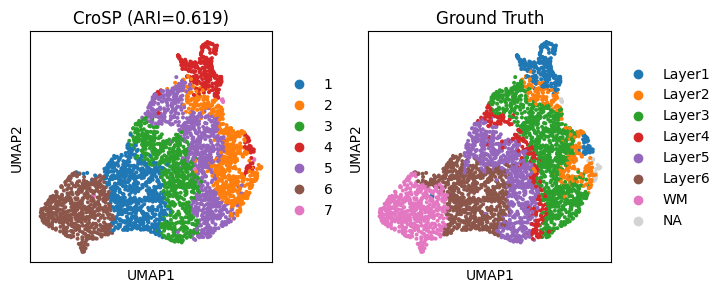

In [49]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color=["mclust", "Ground Truth"], title=['CroSP (ARI=%.3f)'%ARI, "Ground Truth"],show=False)
# plt.savefig(os.path.join(output_dir, f'ump_domain.svg'), bbox_inches='tight', dpi=300)

In [50]:
used_adata = adata[pd.notna(adata.obs['Ground Truth'])]

In [51]:
sc.tl.paga(used_adata, groups='Ground Truth')

/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/root/miniconda3/envs/deepst_env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


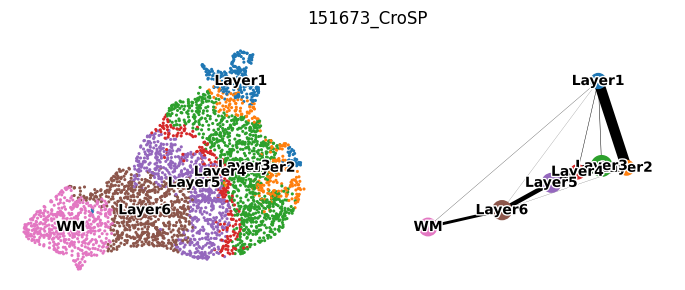

In [52]:
plt.rcParams["figure.figsize"] = (4,3)
sc.pl.paga_compare(used_adata, legend_fontsize=10, frameon=False, size=20,
                   title=data_name+'_CroSP', legend_fontoutline=2, show=False)
plt.savefig(os.path.join(output_dir, f'PAGA.svg'), bbox_inches='tight', dpi=300)